<a href="https://colab.research.google.com/github/RubingLi123/foster_2023spring/blob/2023sp-master/Homeworks/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
#If opening in colab run this cell
!git clone https://github.com/CTVisMe/DS4B_Sp24.git
%cd DS4B_Sp24/Homeworks/

Cloning into 'DS4B_Sp24'...
remote: Enumerating objects: 860, done.
remote: Counting objects: 100% (262/262), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 860 (delta 122), reused 255 (delta 116), pack-reused 598
Receiving objects: 100% (860/860), 159.30 MiB | 22.79 MiB/s, done.
Resolving deltas: 100% (385/385), done.
Updating files: 100% (146/146), done.
/content/DS4B_Sp24/Homeworks/DS4B_Sp24/Homeworks/DS4B_Sp24/Homeworks/DS4B_Sp24/Homeworks/DS4B_Sp24/Homeworks


## # IF OPENING IN COLAB, REMEMBER TO SAVE THIS NOTEBOOK TO YOUR GOOGLE DRIVE!

# HW2: Predicting Patient Show-Up

The purpose of this part of the homework is to get you up to speed with data manipulation and model fitting using Python. These are the skills you will need to have for your term project.

### Background

You've been hired as the manager of Sacred Heart Medical Clinic (SHMC). As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the data containing past appointments (Remember to change this to the specific path of your data).
data_path = "./data/data-hw2.csv"

### Loading the data

**1. Load the data referenced by the path above into a pandas data frame. Print the total number of rows and columns, and show the first few rows in the dataset.**

In [69]:
# Put your answer here
# Load the dataset
df = pd.read_csv(data_path)

# Print the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Print few rows of the DataFrame
df.head()

Number of rows: 110527
Number of columns: 14


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here's a brief summary of the variables you should see:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female.
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor.
7. Age = How old is the patient.
8. Neighborhood - Place where the patient lives.
9. Scholarship - Whether the patient receives financial help.
10. Hypertension - Whether the patient suffers from hypertension.
11. Diabetes - Whether the patient suffers from diabetes.
12. Alcoholism - Whether the patient suffers from alcoholism.
13. Handicap - Whether the patient is handicapped.
14. SMS_received - Whether 1 or more SMS messages were sent to the patient
15. No-show - Whether the patient missed the appointment.

**2. Check out if there are any Na or NaN values. If there are any, drop all the observations that include such values in any of the columns.** (This is not necessarily what you should do in your projects)

In [70]:
# Put your answer here
# Count the NaN values in each column
nan_count = df.isna().sum()

# Check for Na or NaN values
nan_values = df.isna().any().any()

# If there are , drop them
if nan_values:
    df = df.dropna()

    # Print the number of rows and columns after dropping
    print("Number of rows after dropping NaN values:", df.shape[0])
    print("Number of columns after dropping NaN values:", df.shape[1])

    # Print few rows of the DataFrame to verify
    df.head()

else:
    print("No missing values found")

No missing values found


### Dealing with dates

**3. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this).**

In [71]:
# Put your answer here
# Convert 'ScheduledDay' and 'AppointmentDay' into datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Verify the conversion
print(df.dtypes[['ScheduledDay', 'AppointmentDay']])

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object


**4. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, apply "normalize" to ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method.**

In [72]:
# Put your answer here
# Normalize 'ScheduledDay' to remove the time component, keeping only the date
df['ScheduledDay'] = df['ScheduledDay'].dt.normalize()

# Verify the change
print("Normalized columns:\n")
df[['ScheduledDay', 'AppointmentDay']].head()


Normalized columns:



,ScheduledDay,AppointmentDay
0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00
1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00
2,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00
3,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00
4,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00


**5. Create a new column called 'TimeInAdvance' for the difference in days between ScheduledDay and AppointmentDay. Make sure that the new field is numeric - and not of form "TimeDelta", which is the difference between two datetimes. (you can apply `dt.days`  to a datetime object to accomplish this).**

In [73]:
# Put your answer here
# Creating a new column 'TimeInAdvance' - the difference in days between 'ScheduledDay' and 'AppointmentDay'
df['TimeInAdvance'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Verify the new column
df[['ScheduledDay', 'AppointmentDay', 'TimeInAdvance']].head()


,ScheduledDay,AppointmentDay,TimeInAdvance
0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0
1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0
2,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0
3,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0
4,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0


There are many other features you may want to extract from date variables, such as the time at which the appointment was scheduled, the day of the week, the month, etc. However, we will only use TimeInAdvance for the purposes of this homework.

### Cleaning data

**6. Use the "describe" command from pandas to obtain some general stats about the data. Comment on any weird values you see in any of the columns? Remove all observations that include "weird" or otherwise questionable values and comment on why did you remove such observations. Also, print the number of observations you removed.**

In [74]:
# Put your answer here
# General stats about the data
general_stats = df.describe()

# Print general statistics to identify any weird values
print(general_stats)

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.920000e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172615e+12   5.640286e+06      18.000000       0.000000   
50%    3.173180e+13   5.680573e+06      37.000000       0.000000   
75%    9.439170e+13   5.725524e+06      55.000000       0.000000   
max    9.999820e+14   5.790484e+06     115.000000       1.000000   

        Hypertension       Diabetes     Alcoholism       Handicap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

Based on the general stats, we might look for weird or questionable values such as:

 - Negative values in 'Age'
 - Extremely high values in 'Age' that are not plausible.
 - Negative values in 'TimeInAdvance', which would mean an appointment is scheduled after it was supposed to occur

In [75]:
# Identify observations with weird or questionable values
weird_age = df[(df['Age'] < 0) | (df['Age'] > 100)]
weird_time_in_advance = df[df['TimeInAdvance'] < 0]

# Calculate the total number of observations to remove
observations_to_remove = len(weird_age) + len(weird_time_in_advance)

# Remove these observations
df_cleaned = df.drop(weird_age.index).drop(weird_time_in_advance.index)

# Print the number of observations removed
print("Number of observations removed:", observations_to_remove)
df_cleaned

Number of observations removed: 13


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,3.596270e+12,5650093,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,1.557660e+13,5630692,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,9.213490e+13,5630323,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41


The reasons for removal are:

- Age less than 0 or greater than 100 is rarely plausible and likely indicates a data entry error.
- TimeInAdvance less than 0 is logically impossible as it would mean the appointment was scheduled after it occurred, indicating a mistake.

### Dealing with binary variables

**7. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Hint: Take a look at the [where](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.where.html) method. Make sure to also drop the Gender column.**

In [76]:
# Put your answer here
# Adding new column
df_cleaned['IsFemale'] = df_cleaned['Gender'].where(df_cleaned['Gender'] == 'F', 0).where(df_cleaned['Gender'] != 'F', 1)

# Dropping 'Gender' column
df_cleaned = df_cleaned.drop(columns=['Gender'])
df_cleaned

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,35,1
110523,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,35,1
110524,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,41,1
110525,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41,1


**8. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise.**

In [77]:
# Put your answer here
# Mapping the "No-show"column in binary
df_cleaned['No-show'] = df_cleaned['No-show'].map({'Yes': 1, 'No': 0})
df_cleaned

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,1
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,1
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,1
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,35,1
110523,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,35,1
110524,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,41,1
110525,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,41,1


### Dealing with categorical variables

**9. Let's take a look at the Neighbordhood column. How many unique neighborhoods are there? Which are the 5 most common neighborhoods? Which are the 5 least common ones?**

In [78]:
# Put your answer here
# Count unique neighborhoods
unique_neighborhoods = df_cleaned['Neighborhood'].nunique()
print(f"Unique neighborhoods: {unique_neighborhoods}")

# The 5 most common neighborhoods
most_common = df_cleaned['Neighborhood'].value_counts().head(5).reset_index()
most_common.columns = ['Neighborhood', 'Count']
print("\nMost common neighborhoods:\n")
print(most_common.to_string(index=True))

# The 5 least common neighborhoods
least_common = df_cleaned['Neighborhood'].value_counts().tail(5).reset_index()
least_common.columns = ['Neighborhood', 'Count']
print("\nLeast common neighborhoods:\n")
print(least_common.to_string(index=True))

Unique neighborhoods: 81

Most common neighborhoods:

      Neighborhood  Count
0   JARDIM CAMBURI   7717
1      MARIA ORTIZ   5804
2      RESISTÊNCIA   4430
3  JARDIM DA PENHA   3877
4          ITARARÉ   3514

Least common neighborhoods:

                  Neighborhood  Count
0                  ILHA DO BOI     35
1                ILHA DO FRADE     10
2                    AEROPORTO      8
3  ILHAS OCEÂNICAS DE TRINDADE      2
4            PARQUE INDUSTRIAL      1


**10. We often group together categories that are very rare because it's hard to generalize from them. Use .value_counts to find the total in each neighborhood.  Then, for the neighborhoods that appear less than 2000 times in the dataset replace their name with "OTHER". (Code provided below:)**

In [79]:
## sample code - make sure to replace "df" with your data frame name if needed
# counts = df['Neighborhood'].value_counts()
# minor = counts[counts < 2000].index.tolist()
# df.loc[df['Neighborhood'].isin(minor), 'Neighborhood'] = 'OTHER'

# Calculating the value counts of each neighborhood
counts = df_cleaned['Neighborhood'].value_counts()

# Identifying neighborhoods appearing less than 2000 times
minor = counts[counts < 2000].index.tolist()

# Replacing the names of these less common neighborhoods with "OTHER"
df_cleaned.loc[df_cleaned['Neighborhood'].isin(minor), 'Neighborhood'] = 'OTHER'

# Displaying the modified 'Neighborhood' column's value counts to verify the change
print(df_cleaned['Neighborhood'].value_counts())

OTHER                43876
JARDIM CAMBURI        7717
MARIA ORTIZ           5804
RESISTÊNCIA           4430
JARDIM DA PENHA       3877
ITARARÉ               3514
CENTRO                3334
TABUAZEIRO            3131
SANTA MARTHA          3131
JESUS DE NAZARETH     2853
BONFIM                2773
SANTO ANTÔNIO         2744
SANTO ANDRÉ           2571
CARATOÍRA             2565
JABOUR                2509
SÃO PEDRO             2448
ILHA DO PRÍNCIPE      2266
NOVA PALESTINA        2264
ANDORINHAS            2258
DA PENHA              2217
ROMÃO                 2214
GURIGICA              2018
Name: Neighborhood, dtype: int64


**11. Get dummy/indicator variables for each neighborhood and add them to the dataframe. Hint: Take a look at the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method (note - in class we discussed the need to create k-1 dummies if there are k categories when doing regression.  We do NOT have to do this with trees.  Tree models do not require creation of a baseline dummy variable - so you can use drop_first=False with `get_dummies`, which is the default.). Make sure to add the dummies to your data frame, and also drop the Neighborhood column once the dummies are created.**

In [80]:
# Put your answer here
# Creating dummy variables for the 'Neighborhood' column
neighborhood_dummies = pd.get_dummies(df_cleaned['Neighborhood'])

# Concatenating the dummy variables to the original DataFrame
df_cleaned = pd.concat([df_cleaned, neighborhood_dummies], axis=1)

# Drop the original 'Neighborhood' column
df_cleaned = df_cleaned.drop(columns=['Neighborhood'])
df_cleaned

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,MARIA ORTIZ,NOVA PALESTINA,OTHER,RESISTÊNCIA,ROMÃO,SANTA MARTHA,SANTO ANDRÉ,SANTO ANTÔNIO,SÃO PEDRO,TABUAZEIRO
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
110523,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
110524,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
110525,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Dealing with panel data


There are many patients that have made more than one appointment. Panel data (also called longitudinal data) contain observations for the same individuals over multiple periods of time. In our particuclar case, such data may help us to make better predictions.

For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. We want to create a variable that calculates the number of no_shows BEFORE the current appointment..this is advanced so we give you the code to create this attribute.

**12. Create a new column called "PreviousNoShows" that for each appointment includes the number of past appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). (Code provided: Sort the dataframe by PatientID and ScheduledDay. Then, group by PatientID and compute the cumulative sum of the No-show variable)**

In [81]:
## sample code - make sure to replace "df" with your data frame name
# df = df.sort_values(['PatientId', 'ScheduledDay'])
# df['PreviousNoShows'] = df.groupby(['PatientId'])['No-show'].cumsum()

# Sort the DataFrame by 'PatientId' and 'ScheduledDay' to order appointments chronologically for each patient
df = df_cleaned.sort_values(['PatientId', 'ScheduledDay'])

# Compute the cumulative sum of no-shows for each patient, then subtract the current no-show to reflect previous no-shows only
df['PreviousNoShows'] = df.groupby('PatientId')['No-show'].cumsum() - df['No-show']

# Display the first few rows to verify the 'PreviousNoShows' column
print(df.head())


        PatientId  AppointmentID              ScheduledDay  \
100517    39200.0        5751990 2016-05-31 00:00:00+00:00   
105430    43700.0        5760144 2016-06-01 00:00:00+00:00   
3950      93800.0        5712759 2016-05-18 00:00:00+00:00   
73303    142000.0        5637648 2016-04-29 00:00:00+00:00   
73228    538000.0        5637728 2016-04-29 00:00:00+00:00   

                  AppointmentDay  Age  Scholarship  Hypertension  Diabetes  \
100517 2016-06-03 00:00:00+00:00   44            0             0         0   
105430 2016-06-01 00:00:00+00:00   39            0             0         1   
3950   2016-05-18 00:00:00+00:00   33            0             0         0   
73303  2016-05-02 00:00:00+00:00   12            0             0         0   
73228  2016-05-06 00:00:00+00:00   14            0             0         0   

        Alcoholism  Handicap  ...  NOVA PALESTINA  OTHER  RESISTÊNCIA ROMÃO  \
100517           0         0  ...               0      1            0     0   


There are many other features we could compute with this data set, such as time between appointments, number of past appointments, fraction of appointments to which the patient did not show up, etc. However, for the purposes of this homework, we will only work with PreviousNoShows.

### Removing the unnecessary

**13. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay.**

In [82]:
# Put your answer here
# Drop the unnecessary columns
df = df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'])

# Verify that the columns have been removed
print(df.head())


        Age  Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
100517   44            0             0         0           0         0   
105430   39            0             0         1           0         0   
3950     33            0             0         0           0         0   
73303    12            0             0         0           0         0   
73228    14            0             0         0           0         0   

        SMS_received  No-show  TimeInAdvance IsFemale  ...  NOVA PALESTINA  \
100517             0        0              3        1  ...               0   
105430             0        0              0        0  ...               0   
3950               0        0              0        1  ...               0   
73303              0        0              3        0  ...               0   
73228              1        0              7        1  ...               0   

        OTHER  RESISTÊNCIA  ROMÃO  SANTA MARTHA  SANTO ANDRÉ  SANTO ANTÔNIO  \
100517 

### Predictive modeling

**14. Let's build a model to predict No-Show using a DecisionTreeClassifier. First, split the data into training and test (80/20) - using `random_state=123`.  Using max_depth=3, fit the DecisionTreeClassifier to the training set, and report the accuracy on the training set and the test set.**


In [84]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
# Put your answer here

# Define features and target variable
X = df.drop('No-show', axis=1)
y = df['No-show']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize and fit the Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=123)
dtc.fit(X_train, y_train)

# Predictions
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

# Calculate and print the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Training set accuracy: {accuracy_train}")
print(f"Test set accuracy: {accuracy_test}")

Training set accuracy: 0.7984187487982265
Test set accuracy: 0.7993032620006334


**15. Now lets do 5-fold cross validation by calling cross_val_score with the FULL X and y data (the function does the splitting and fitting for us). Use the option `scoring="accuracy"`.  Find the mean accuracy of the 5 numbers returned.**

In [85]:
# Put your answer here
# Perform 5-fold cross-validation
cv_scores = cross_val_score(dtc, X, y, cv=5, scoring='accuracy')

# Calculate the mean accuracy
cv_mean_accuracy = cv_scores.mean()
print(f"Mean CV accuracy: {cv_mean_accuracy}")

Mean CV accuracy: 0.7985775573564153


**16. Lets see what is the optimal depth for this tree. Create a for-loop that cycles over all max_depth values between 2 and 15 and prints out the mean cross-validated test accuracy for each value of max_depth.  Which value of max_depth has the highest cross-validated accuracy?**

In [89]:
# Put your answer here
cv_accuracies = []
for depth in range(2, 16):
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=123)
    cv_scores = cross_val_score(dtc, X, y, cv=5, scoring='accuracy')
    cv_mean_accuracy = np.mean(cv_scores)
    cv_accuracies.append(cv_mean_accuracy)
    print(f"Depth: {depth}, Mean CV Accuracy: {cv_mean_accuracy}")

# Find the depth with the highest accuracy
optimal_depth = range(2, 16)[np.argmax(cv_accuracies)]
print(f"\nOptimal max_depth: {optimal_depth}")

Depth: 2, Mean CV Accuracy: 0.7981160758070616
Depth: 3, Mean CV Accuracy: 0.7985775573564153
Depth: 4, Mean CV Accuracy: 0.7979984414410641
Depth: 5, Mean CV Accuracy: 0.8002334559114699
Depth: 6, Mean CV Accuracy: 0.8000796232696933
Depth: 7, Mean CV Accuracy: 0.79966338526637
Depth: 8, Mean CV Accuracy: 0.7988580684062422
Depth: 9, Mean CV Accuracy: 0.7982337114012569
Depth: 10, Mean CV Accuracy: 0.7967316442597806
Depth: 11, Mean CV Accuracy: 0.796188729076605
Depth: 12, Mean CV Accuracy: 0.7937546507003741
Depth: 13, Mean CV Accuracy: 0.7923340061389358
Depth: 14, Mean CV Accuracy: 0.7910129127721816
Depth: 15, Mean CV Accuracy: 0.7883164224840133

Optimal max_depth: 5


**16b (Extra Credit) : Using the same for-loop, output for each level of max_depth the trainging accuracy, test accuracy, and cross_val accuracy.  Make a plot of depth(X-axis) vs accuracy(Y-axis) with three lines for (train, test, and cv) accuracy.   Interpret what you see.**


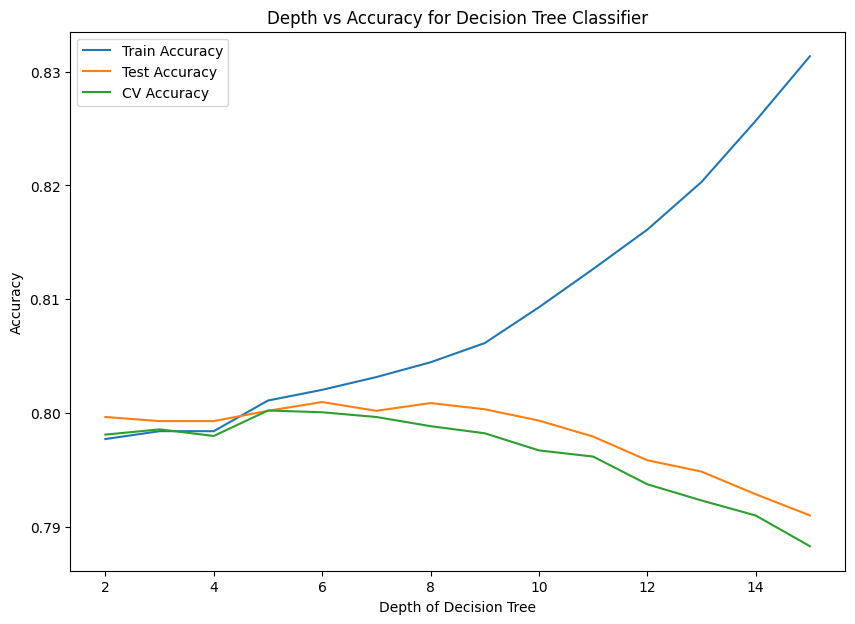

In [88]:
# Put your answer here
# Tracking training, testing, and cross-validation accuracies
train_accuracies = []
test_accuracies = []
cv_accuracies = []

# Looping through depths to compute accuracies
for depth in range(2, 16):
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=123)

    # Training
    dtc.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, dtc.predict(X_train))
    train_accuracies.append(train_acc)

    # Testing
    test_acc = accuracy_score(y_test, dtc.predict(X_test))
    test_accuracies.append(test_acc)

    # Cross-validation
    cv_scores = cross_val_score(dtc, X, y, cv=5, scoring='accuracy')
    cv_accuracies.append(cv_scores.mean())

# Plotting
depths = range(2, 16)
plt.figure(figsize=(10, 7))
plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.plot(depths, cv_accuracies, label='CV Accuracy')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Depth vs Accuracy for Decision Tree Classifier')
plt.show()

Here's an interpretation based on trends observed:

- Training Accuracy (Blue Line): This line goes up consistently as the depth of the decision tree increases. This is expected because a deeper tree can capture more details of the training data.

- Test Accuracy (Orange Line): The test accuracy initially increases with depth, indicating that the model is learning and improving its ability to generalize. However, beyond a max depth, the test accuracy plateaus and then starts to decrease, suggesting that the model is starting to overfit the training data. Overfitting occurs when the model becomes too complex and begins to capture noise in the training set, which does not generalize well to new data.

- Cross-Validation Accuracy (Green Line): This line behaves similarly to the test accuracy, which confirms the findings from the test set. The initial increase suggests better generalization with increased depth, but then it levels off and begins to decrease, indicating overfitting.

From the graph, we can infer that at an optimal depth before the test and cross-validation accuracies start to decrease. This point represents a balance between underfitting (not capturing enough of the data's complexity) and overfitting (capturing too much noise).

**17.  Fit the tree model (again) using the optimal depth.  Create the 2x2 confusion matrix using the predictions on the test set, vs the true values of the test set (Y_test).**

In [90]:
# Put your answer here
from sklearn.metrics import confusion_matrix

# Fit the model with optimal depth
dtc_optimal = DecisionTreeClassifier(max_depth=optimal_depth, random_state=123)
dtc_optimal.fit(X_train, y_train)

# Predictions on the test set
y_pred_optimal_test = dtc_optimal.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimal_test)
print(conf_matrix)

[[17480   195]
 [ 4221   207]]


**18. Use the functions `precision_score` and `recall_score` to calculate precision and recall - these numbers should correspond to the appropriate calculations from the 2x2 table.**

In [95]:
# Calculate precision and recall
precision = precision_score(y_test, y_pred_optimal_test)
recall = recall_score(y_test, y_pred_optimal_test)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Verify to correspond to 2x2 table
# Given confusion matrix values
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# Calculating precision and recall
precision_cal = TP / (TP + FP)
recall_cal = TP / (TP + FN)

print(f"\nPrecision on mathematical calculation: {precision_cal}")
print(f"Recall on mathematical calculation: {recall_cal}")



Precision: 0.5149253731343284
Recall: 0.046747967479674794

Precision on mathematical calculation: 0.5149253731343284
Recall on mathematical calculation: 0.046747967479674794


**18b.(Extra Credit - 2 points) The precision and recall above were calculated using a threshold of 0.5 (that is, any case with a probability over 0.5 is predicted as No-show).  As we discussed in class, changing the threshold will have an effect on precision and recall.  Change the threshold of labelling a No-show to 0.9 and re-calcuate precision and recall.  (you will need to generate a new 2x2 table and calculate P&R from the values in the table). Interpret the change in P&R between the two thresholds.**

In [102]:
# Get probability scores
y_probs = dtc_optimal.predict_proba(X_test)[:, 1]  # Probability of class 1

# Apply the new threshold to decide the class labels
new_threshold = 0.9
y_pred_new_threshold = (y_probs > new_threshold).astype(int)

# Generating the new confusion matrix
new_conf_matrix = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix:\n",new_conf_matrix)

# Calculate precision and recall
new_precision = precision_score(y_test, y_pred_threshold)
new_recall = recall_score(y_test, y_pred_threshold)
print(f"\nNew Precision: {new_precision}")
print(f"New Recall: {new_recall}")


Confusion Matrix:
 [[17675     0]
 [ 4428     0]]

New Precision: 0.0
New Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Since there are no instances where the model predicted No-shows (no TP or FP), both the precision and recall are 0.0. This means:

- Precision: There are no correct predictions of No-shows because the model didn't predict any No-shows at all. Precision is undefined when there are no positive predictions, but it is conventionally treated as 0 if there are no true positives.

- Recall: The model failed to identify any of the actual No-shows. Recall is a measure of a model's ability to find all the relevant cases within a dataset.

This interpretation indicates a model that is not useful for predicting No-shows after changing the threshold. In practical terms, this model would lead you to believe that you do not need to worry about No-shows, which is not the case, as indicated by the 4,428 missed No-shows (false negatives). It highlights the importance of choosing an appropriate threshold for making predictions, especially in imbalanced datasets where one class (No-shows) might be significantly less common than the other (shows).